# Algorithme supervisé : Régression linéaire

In [32]:
#librairie
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
import os

In [19]:
os.chdir('/Diamonds/Data')
diamond = pd.read_csv('diamond_final.csv')
diamond.drop('Unnamed: 0' , axis=1 , inplace=True)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,7,63.3,58.0,335,4.34,4.35,2.75


In [22]:
X = diamond.drop(labels='price',axis=1)
y = diamond['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [25]:
#Coefficient de corrélation
lr.score(X_train, y_train)

0.9092146333227378

In [26]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
carat,11227.702885
cut,-127.855942
color,-332.241548
clarity,-504.513134
depth,-61.276369
table,-16.585843
x,-1085.487717
y,110.774746
z,-103.055126


In [27]:
predictions = lr.predict(X_test)

(-598.85, 49426.38693683537, -5082.9294372688055, 44942.30749956657)

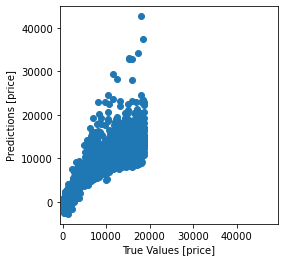

In [30]:
plt.scatter(y_test,predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')

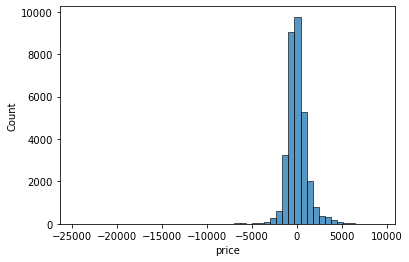

In [34]:
sns.histplot((y_test-predictions),bins=50)

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
#print('MSE:', metrics.mean_squared_error(y_test, predictions))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 806.2346055309506
